In [5]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [8]:
gloterr = pd.read_csv("C:/Users/aishaque/Downloads/globalterrorismdb_0718dist.csv", encoding='latin1')

In [9]:
gloterr

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [10]:
gloterr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
gloterr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
#We can see that certain columns are named in a wrong manner. Renaming them:

gloterr.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace = True)

In [16]:
gloterr.drop("eventid", axis = 1)

,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2017,12,31,NaN,0,NaN,92,India,6,South Asia,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
gloterr.isnull().sum()

eventid               0     
Year                  0     
Month                 0     
Day                   0     
approxdate            172452
extended              0     
resolution            179471
country               0     
Country               0     
region                0     
Region                0     
state                 421   
city                  434   
latitude              4556  
longitude             4557  
specificity           6     
vicinity              0     
location              126196
Summary               66129 
crit1                 0     
crit2                 0     
crit3                 0     
doubtterr             1     
alternative           152680
alternative_txt       152680
multiple              1     
success               0     
suicide               0     
attacktype1           0     
AttackType            0     
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [26]:
#removing columns which have a lot of missing values
#There are a lot of columns which have missing values. Instead of removing them,
#only taking the important data from the data set

In [27]:
gloterr = gloterr[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [28]:
gloterr.isnull().sum()

Year           0     
Month          0     
Day            0     
Country        0     
state          421   
Region         0     
city           434   
latitude       4556  
longitude      4557  
AttackType     0     
Killed         10313 
Wounded        16311 
Target         636   
Summary        66129 
Group          0     
Target_type    0     
Weapon_type    0     
Motive         131130
dtype: int64

In [29]:
gloterr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

### Descriptive Analysis of the data

In [30]:
print("Country with the most attacks:", gloterr['Country'].value_counts().idxmax())
print("City with the most attacks:", gloterr['city'].value_counts().index[1])
print("Region with the most attacks:", gloterr['Region'].value_counts().idxmax())
print("Year with the most attacks:", gloterr['Year'].value_counts().idxmax())
print("Month with the most attacks:", gloterr['Month'].value_counts().idxmax())
print("Group with the most attacks:", gloterr['Group'].value_counts().index[1])
print("Most Attack Types:", gloterr['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [35]:
gloterr['Year'].value_counts(dropna = False).sort_index()

1970    651  
1971    471  
1972    568  
1973    473  
1974    581  
1975    740  
1976    923  
1977    1319 
1978    1526 
1979    2662 
1980    2662 
1981    2586 
1982    2544 
1983    2870 
1984    3495 
1985    2915 
1986    2860 
1987    3183 
1988    3721 
1989    4324 
1990    3887 
1991    4683 
1992    5071 
1994    3456 
1995    3081 
1996    3058 
1997    3197 
1998    934  
1999    1395 
2000    1814 
2001    1906 
2002    1333 
2003    1278 
2004    1166 
2005    2017 
2006    2758 
2007    3242 
2008    4805 
2009    4721 
2010    4826 
2011    5076 
2012    8522 
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

### Data Visualization

<Figure size 1296x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

Text(0.5, 0, 'Attack Year')

Text(0, 0.5, 'Number of Attacks each year')

Text(0.5, 1.0, 'Attack_of_Years')

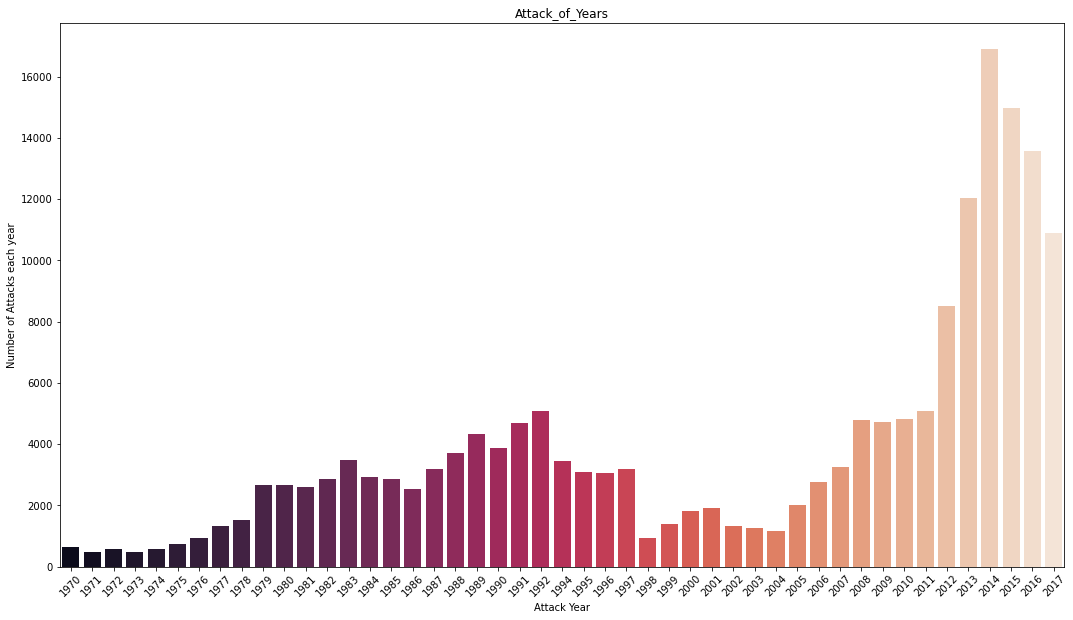

In [36]:
x_year = gloterr['Year'].unique()
y_count_years = gloterr['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

(<Figure size 1080x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9d8705040>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

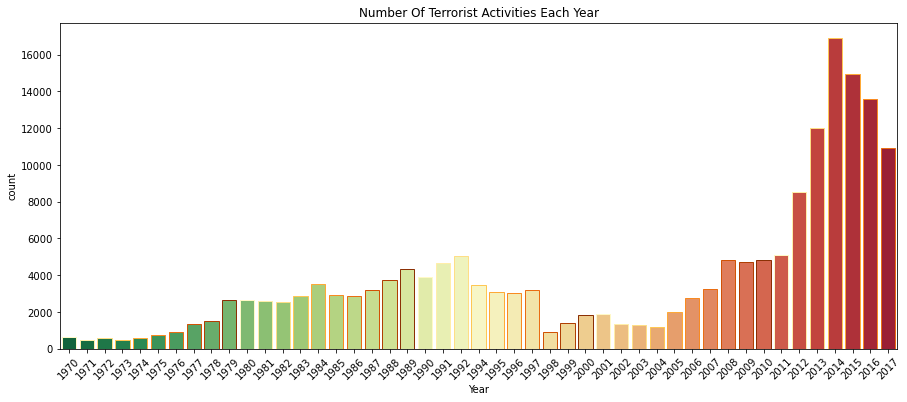

In [37]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data = gloterr,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Text(0.5, 1.0, 'Terrorist Activities by Region in each Year')

Text(0, 0.5, 'Number of Attacks')

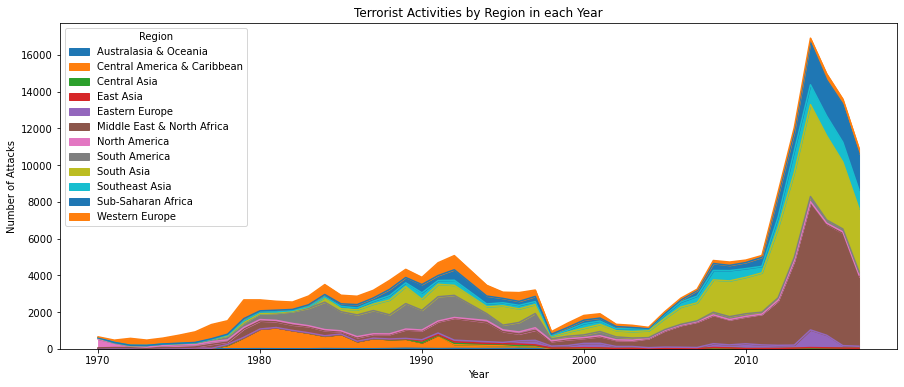

In [39]:
pd.crosstab(gloterr.Year, gloterr.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [46]:
gloterr.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia          8306 
Philippines       6908 
Peru              6096 
El Salvador       5320 
United Kingdom    5235 
Turkey            4292 
Somalia           4142 
Nigeria           3907 
Thailand          3849 
Yemen             3347 
Spain             3249 
Name: Country, dtype: int64

(<Figure size 1080x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f99fb14df0>)

Text(0.5, 1.0, 'Top Countries Affected')

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

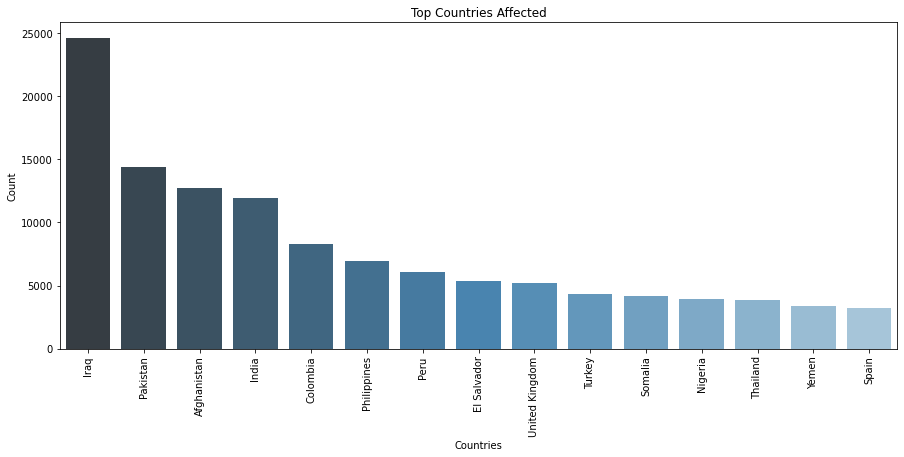

In [47]:
plt.subplots(figsize=(15,6))
sns.barplot(gloterr['Country'].value_counts()[:15].index,gloterr['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [48]:
gloterr.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [51]:
# Total Number of people killed in terror attack

death = gloterr.loc[:,'Killed']

In [55]:
int(sum(death))

411868